In [9]:
! pip install wordcloud

# use case 

# bigrams

In [1]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

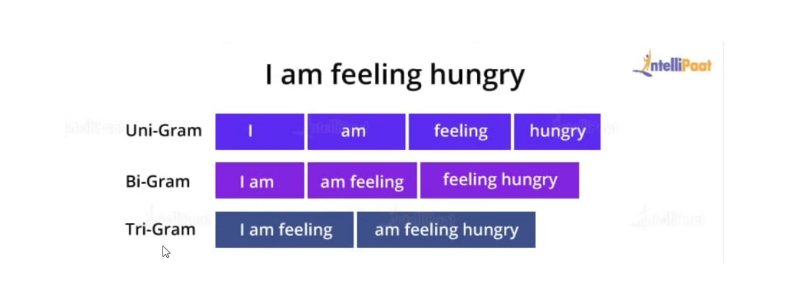

# start over again , to get the words

In [2]:
import unicodedata
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to C:\Users\Asmita
[nltk_data]     Chatterjee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Asmita
[nltk_data]     Chatterjee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# read the dataframe again 
df=pd.read_csv('btctweets1.csv')

In [4]:
df_cppy=df

In [5]:
# do some basic cleaning on the dataframe tweet column 
def basic_clean(text):
    wnl=nltk.stem.WordNetLemmatizer()
    stopwords=nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    ##first remove all words starting with @
    text=re.sub(r'@\w+',' ',text)
    ###remove the utrls starting with http
    text=re.sub(r'http\S+',' ',text)
    ###remove all  non alphabetic characters 
    text=re.sub(r'[^a-z A-Z]',' ',text)
    ### remove 3  leter characters 
    #text=re.sub(r'\b\w{1,2}\b',text)
    ##remove th eextra spaces
    text=re.sub(r' +',' ',text)
    ##break down into words
    words=text.split()
    return [wnl.lemmatize(word) for word in  words if word not in stopwords]


In [6]:
words = basic_clean(''.join(str(df['tweet'].tolist()))) 

In [7]:
words

['want',
 'talk',
 'better',
 'isnt',
 'ecstasy',
 'u',
 'try',
 'turning',
 'engine',
 'battery',
 'dead',
 'take',
 'two',
 'regretamine',
 'call',
 'morning',
 'soon',
 'gift',
 'model',
 'guy',
 'really',
 'using',
 'energy',
 'debate',
 'topic',
 'let',
 'talk',
 'elon',
 'musk',
 'highly',
 'confident',
 'spacex',
 'land',
 'human',
 'mar',
 'u',
 'whyarelondonmensotrash',
 'sending',
 'doge',
 'along',
 'crashed',
 'let',
 'know',
 'invest',
 'jupiter',
 'coin',
 'fact',
 'like',
 'bitcoin',
 'make',
 'want',
 'buy',
 'confidence',
 'elon',
 'musk',
 'intention',
 'future',
 'humanity',
 'future',
 'tesla',
 'bitcoin',
 'piece',
 'capture',
 'sentiment',
 'new',
 'space',
 'race',
 'god',
 'complex',
 'probably',
 'freeing',
 'control',
 'human',
 'permanently',
 'add',
 'profile',
 'verified',
 'cyanobacteria',
 'owe',
 'everything',
 'technically',
 'evolution',
 'life',
 'enough',
 'guidance',
 'man',
 'intellectual',
 'prowess',
 'self',
 'evident',
 'get',
 'head',
 'around

# find out the top 10  ngrams here bigrams

In [8]:
(pd.Series(nltk.ngrams(words,2)).value_counts())[:10]

(bitcoin, btc)      44
(market, cap)       42
(btc, eth)          41
(crypto, market)    37
(btc, dominance)    37
(total, crypto)     34
(cap, btc)          34
(closed, total)     34
(greed, fear)       32
(fear, index)       32
dtype: int64

In [9]:
# get the top 20 bigram 
bg=(pd.Series(nltk.ngrams(words,2)).value_counts())[:20]

In [10]:
type(bg)

pandas.core.series.Series

# convert the series to a bigram 

In [11]:
bigram_df=bg.to_frame().reset_index()

In [12]:
bigram_df.head(3), bigram_df.index

(            index   0
 0  (bitcoin, btc)  44
 1   (market, cap)  42
 2      (btc, eth)  41,
 RangeIndex(start=0, stop=20, step=1))

In [13]:
bigram_df.columns

Index(['index', 0], dtype='object')

In [14]:
bigram_df=bigram_df.rename(columns={0:'bigram_count'})

In [15]:
bigram_df

,index,bigram_count
0,"(bitcoin, btc)",44
1,"(market, cap)",42
2,"(btc, eth)",41
3,"(crypto, market)",37
4,"(btc, dominance)",37
5,"(total, crypto)",34
6,"(cap, btc)",34
7,"(closed, total)",34
8,"(greed, fear)",32
9,"(fear, index)",32


In [16]:
# create    a dictionary  of bigrams  and their counts 
d=bigram_df.set_index('index').T

In [17]:
d

index,"(bitcoin, btc)","(market, cap)","(btc, eth)","(crypto, market)","(btc, dominance)","(total, crypto)","(cap, btc)","(closed, total)","(greed, fear)","(fear, index)","(daily, candle)","(feb, utc)","(candle, closed)","(btc, feb)","(utc, daily)","(btc, hourly)","(crypto, greed)","(dominance, crypto)","(chart, btc)","(extreme, greed)"
bigram_count,44,42,41,37,37,34,34,34,32,32,32,32,32,32,31,30,30,28,27,26


In [18]:
d=bigram_df.set_index('index').T.to_dict('records')

In [19]:
d

[{('bitcoin', 'btc'): 44,
  ('market', 'cap'): 42,
  ('btc', 'eth'): 41,
  ('crypto', 'market'): 37,
  ('btc', 'dominance'): 37,
  ('total', 'crypto'): 34,
  ('cap', 'btc'): 34,
  ('closed', 'total'): 34,
  ('greed', 'fear'): 32,
  ('fear', 'index'): 32,
  ('daily', 'candle'): 32,
  ('feb', 'utc'): 32,
  ('candle', 'closed'): 32,
  ('btc', 'feb'): 32,
  ('utc', 'daily'): 31,
  ('btc', 'hourly'): 30,
  ('crypto', 'greed'): 30,
  ('dominance', 'crypto'): 28,
  ('chart', 'btc'): 27,
  ('extreme', 'greed'): 26}]

In [20]:
type(d)

list

# here d is a dictionary  of bigrams  and their counts 

# next , action item is to showcase the grapcial architecture 

In [21]:
!pip install networkx

In [22]:
import networkx as nx

In [23]:
# create network graph
G=nx.Graph()

In [24]:
G

# create connections between nodes

In [25]:
for k , v in  d[0].items():
    G.add_edge(k[0],k[1],weight=(v*10))
    
    
G.add_node("btc" , weight=100)    ## btc is the central point of all sorts##v btc is a  word

In [26]:
G

# now picturize the graph 

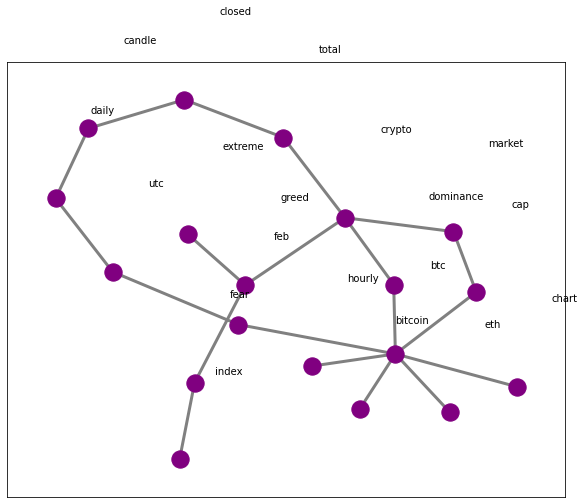

In [39]:
fig,ax=plt.subplots(figsize=(10,8))

pos=nx.spring_layout(G,k=2)

#plot networks

nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)
for key , value in pos.items():
    x , y=value[0] +0.124, value[1]+0.45
    ax.text(x,y , s =key )#,bbox=dict(facecolor='red', alpha=0.25),
            #horizontalalignment='center', fontsize=13  )
plt.show()    
    